In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

%run model_evaluation.ipynb

In [2]:
df = pd.read_csv(r'../Data/train.csv')
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [3]:
df.shape

(8693, 14)

In [4]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
## Duplicate rows check

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported]
Index: []


In [7]:
# Print number of unique values for each column

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print('- - - - -' * 10)
    
unique_counts = df.nunique()
print("\nNumber of unique values in each column:")
print(unique_counts)

# Some columns have missing values in it

Unique values in 'PassengerId': ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -
Unique values in 'HomePlanet': ['Europa' 'Earth' 'Mars' nan]
- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -
Unique values in 'CryoSleep': [False True nan]
- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -
Unique values in 'Cabin': ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -
Unique values in 'Destination': ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -- - - - -
Unique values in 'Age': [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.

In [8]:
## Distribution of target variable

unique_counts = df['Transported'].value_counts()
print(unique_counts)

# Target variable is almost equally distributed

Transported
True     4378
False    4315
Name: count, dtype: int64


In [9]:
## Dropping columns which are not required

df_cleaned = df.copy()
columns_to_drop = ['Name']
df_cleaned.drop(columns=columns_to_drop, inplace=True)

In [10]:
df_cleaned.shape

(8693, 13)

In [11]:
## missing values check

missing_values = df_cleaned.isnull().sum()
total_cells = df_cleaned.shape[0]
missing_percentage = (missing_values / total_cells) * 100

missing_info = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
print(missing_info)

              Missing Values  Percentage
PassengerId                0    0.000000
HomePlanet               201    2.312205
CryoSleep                217    2.496261
Cabin                    199    2.289198
Destination              182    2.093639
Age                      179    2.059128
VIP                      203    2.335212
RoomService              181    2.082135
FoodCourt                183    2.105142
ShoppingMall             208    2.392730
Spa                      183    2.105142
VRDeck                   188    2.162660
Transported                0    0.000000


In [12]:
## Imputing missing values 

def impute_missing_values(data):

    columns_with_missing_values = [col for col in data.columns if data[col].isna().any()]
    
    for col in columns_with_missing_values:
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)        
    
    return data


df_cleaned = impute_missing_values(df_cleaned)

In [13]:
# Statistical summary of the numerical columns in the data

df_cleaned.describe().T

count        mean          std  min   25%   50%   75%      max
Age           8693.0   28.728517    14.355438  0.0  20.0  27.0  37.0     79.0
RoomService   8693.0  220.009318   660.519050  0.0   0.0   0.0  41.0  14327.0
FoodCourt     8693.0  448.434027  1595.790627  0.0   0.0   0.0  61.0  29813.0
ShoppingMall  8693.0  169.572300   598.007164  0.0   0.0   0.0  22.0  23492.0
Spa           8693.0  304.588865  1125.562559  0.0   0.0   0.0  53.0  22408.0
VRDeck        8693.0  298.261820  1134.126417  0.0   0.0   0.0  40.0  24133.0

In [14]:
# Statistical summary of the categorical columns in the data

df_cleaned.describe(include=['object', 'category']).T

count unique          top  freq
PassengerId  8693   8693      0001_01     1
HomePlanet   8693      3        Earth  4803
Cabin        8693   6560      G/734/S   207
Destination  8693      3  TRAPPIST-1e  6097

In [15]:
categorical_cols = df_cleaned.select_dtypes(exclude=['number']).columns.tolist()

def category_unique_value(data, cat_columns):
    for col in cat_columns:
        print("Unique values and corresponding data counts for feature: " + col)
        print("-" * 90)
        df_temp = pd.concat(
            [
                data[col].value_counts(),
                data[col].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.col = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

category_unique_value(df_cleaned, categorical_cols)

# As per the dataset, Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.
# - Would extract these two parts and use them as separate features, this might be related to the target that are associated with groups or positions within groups

# The Cabin column takes the form deck/num/side, will have to feature engineer it

Unique values and corresponding data counts for feature: PassengerId
------------------------------------------------------------------------------------------
             count  proportion
PassengerId                   
0001_01          1    0.011504
6136_01          1    0.011504
6141_01          1    0.011504
6139_06          1    0.011504
6139_05          1    0.011504
...            ...         ...
3126_01          1    0.011504
3124_03          1    0.011504
3124_02          1    0.011504
3124_01          1    0.011504
9280_02          1    0.011504

[8693 rows x 2 columns]
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: HomePlanet
------------------------------------------------------------------------------------------
            count  proportion
HomePlanet                   
Earth        4803   55.251352
Europa       2131   24.513977
Mars         1759   20.234672
------------

### Feature Engineering

In [16]:
## PassengerId column

# Split passenger_id into group and position
df_cleaned[['group', 'position']] = df_cleaned['PassengerId'].str.split('_', expand=True)
df_cleaned['group'] = df_cleaned['group'].astype(int)
df_cleaned['position'] = df_cleaned['position'].astype(int)

# Calculating group size and adding as a new feature
group_sizes = df_cleaned.groupby('group').size().reset_index(name='group_size')
df_cleaned = df_cleaned.merge(group_sizes, on='group')

# Dropping the original passenger_id column
df_cleaned.drop(columns=['PassengerId'], inplace=True)

In [17]:
## Cabin column

# Extracting deck, number, and side as separate features 
df_cleaned['Deck'] = df_cleaned['Cabin'].str.extract(r'([A-Za-z])').astype(str)
df_cleaned['DeckNumber'] = df_cleaned['Cabin'].str.extract(r'(\d+)').astype(float)
df_cleaned['Side'] = df_cleaned['Cabin'].str.extract(r'(/([A-Za-z]))')[1].astype(str)

# Dropping the original Cabin column if separate features are created
df_cleaned.drop(columns=['Cabin'], inplace=True)

## Exploratory Data Analysis

### Univariate Analysis

#### Numerical Feature Summary

In [18]:
## A function to check the distribution/spread of the data using histogram, box plot, violin plot and cumulative density distribution plot. 
from tabulate import tabulate

def summary(data, num_feature):
    
    x_min = data[num_feature].min()
    x_max = data[num_feature].max()
    Q1 = data[num_feature].quantile(0.25)
    Q2 = data[num_feature].quantile(0.50)
    Q3 = data[num_feature].quantile(0.75)

    dict = {"Min": x_min, "Q1": Q1, "Q2": Q2, "Q3": Q3, "Max": x_max}
    summary_df = pd.DataFrame(data=dict, index=["Value"])
    print(f"5 Point Summary of {num_feature} Attribute:\n")
    print(tabulate(summary_df, headers="keys", tablefmt="psql"))

    fig = plt.figure(figsize=(10, 5))
    plt.subplots_adjust(hspace=0.6)
    sns.set_palette("Pastel1")

    plt.subplot(221, frameon=True)
    ax1 = sns.distplot(data[num_feature], color="purple")
    ax1.axvline(
        np.mean(data[num_feature]), color="purple", linestyle="--"
    )  # Adds mean to the histogram
    ax1.axvline(
        np.median(data[num_feature]), color="black", linestyle="-"
    )  # Adds median to the histogram
    plt.title(f"{num_feature} Density Distribution")
    
    plt.subplot(222, frameon=True)
    ax2 = sns.violinplot(x=data[num_feature], palette="Accent", split=True)
    plt.title(f"{num_feature} Violinplot")
    
    plt.subplot(223, frameon=True, sharex=ax1)
    ax3 = sns.boxplot(
        x=data[num_feature], palette="cool", width=0.7, linewidth=0.6, showmeans=True
    )
    plt.title(f"{num_feature} Boxplot")
    
    plt.subplot(224, frameon=True, sharex=ax2)
    ax4 = sns.kdeplot(data[num_feature], cumulative=True)
    plt.title(f"{num_feature} Cumulative Density Distribution")

    plt.show()

5 Point Summary of Age Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |   20 |   27 |   37 |    79 |
+-------+-------+------+------+------+-------+


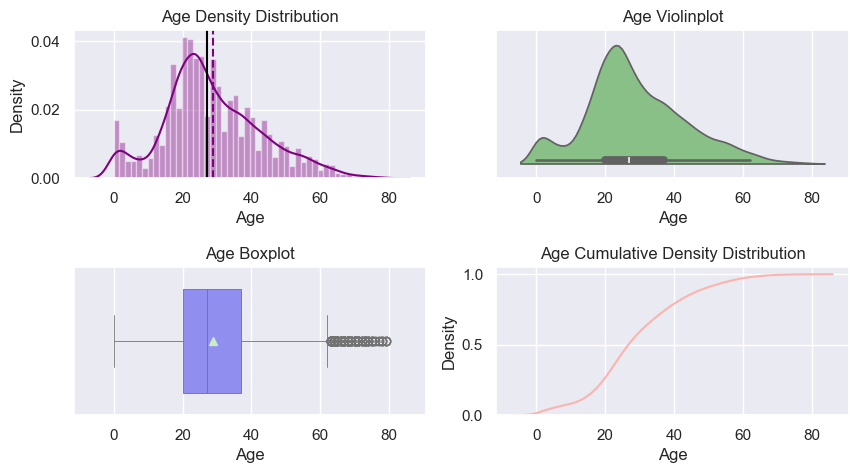

------------------------------------------------------------------------------------------------------------------------
5 Point Summary of RoomService Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    0 |    0 |   41 | 14327 |
+-------+-------+------+------+------+-------+


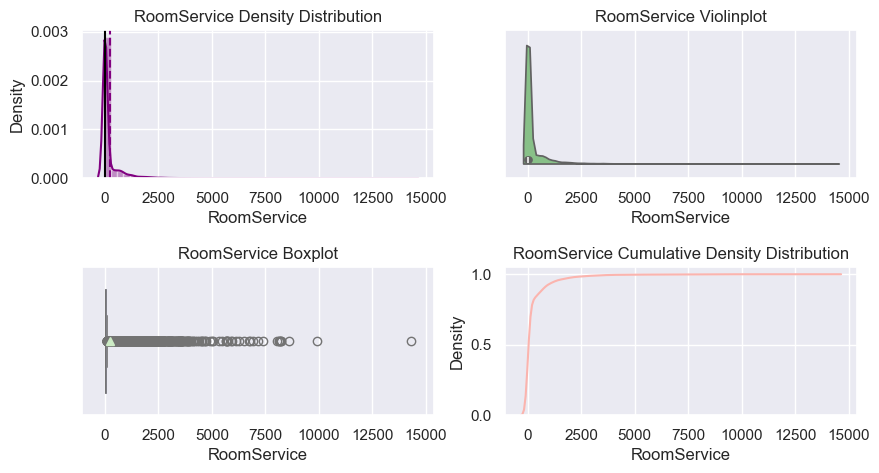

------------------------------------------------------------------------------------------------------------------------
5 Point Summary of FoodCourt Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    0 |    0 |   61 | 29813 |
+-------+-------+------+------+------+-------+


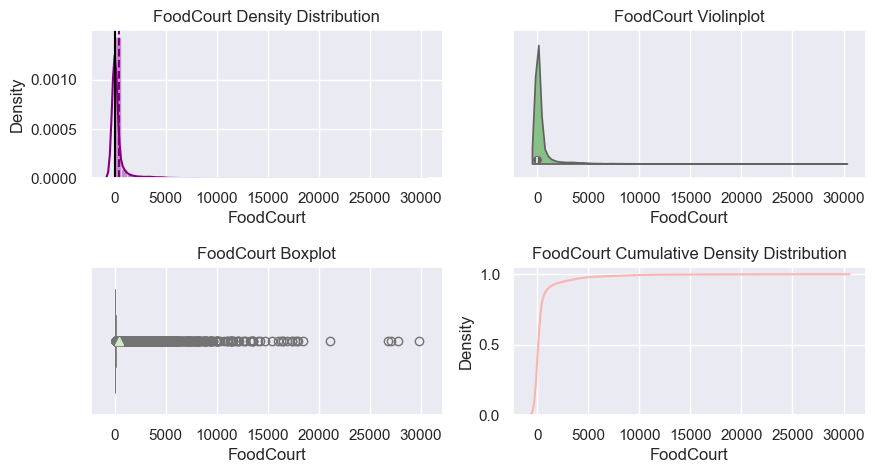

------------------------------------------------------------------------------------------------------------------------
5 Point Summary of ShoppingMall Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    0 |    0 |   22 | 23492 |
+-------+-------+------+------+------+-------+


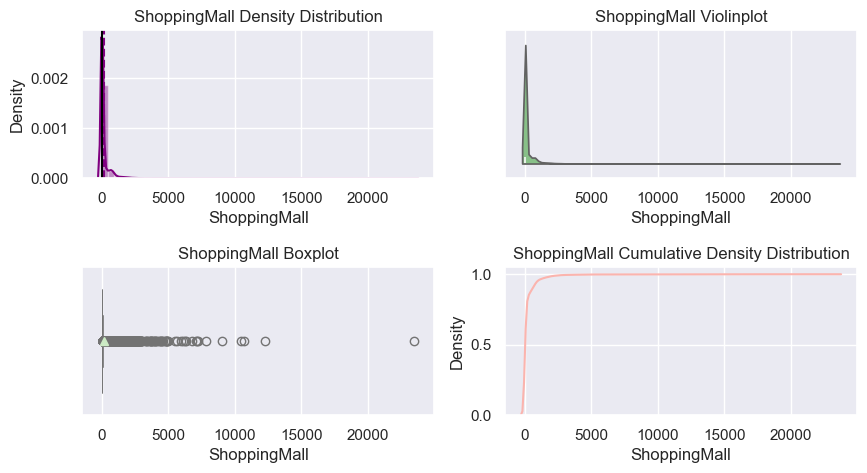

------------------------------------------------------------------------------------------------------------------------
5 Point Summary of Spa Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    0 |    0 |   53 | 22408 |
+-------+-------+------+------+------+-------+


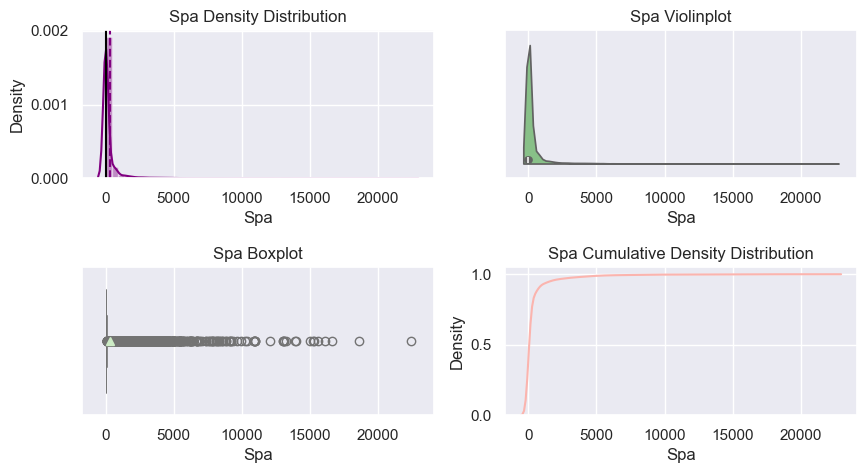

------------------------------------------------------------------------------------------------------------------------
5 Point Summary of VRDeck Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    0 |    0 |   40 | 24133 |
+-------+-------+------+------+------+-------+


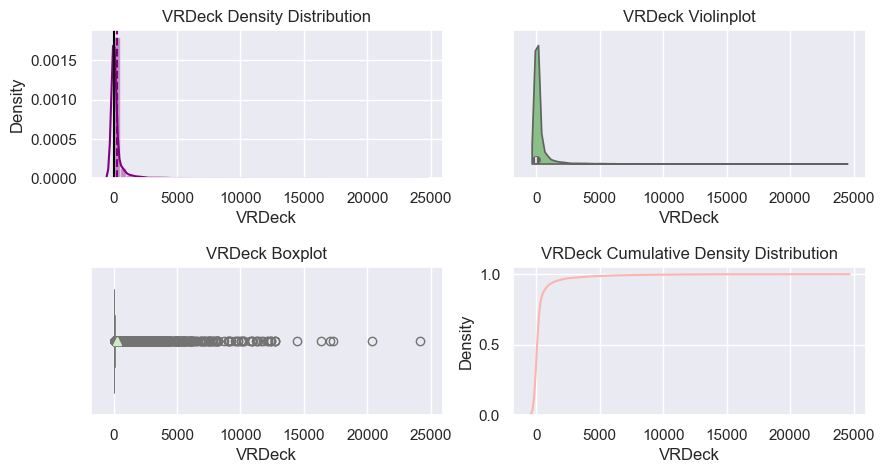

------------------------------------------------------------------------------------------------------------------------
5 Point Summary of group Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 | 2319 | 4630 | 6883 |  9280 |
+-------+-------+------+------+------+-------+


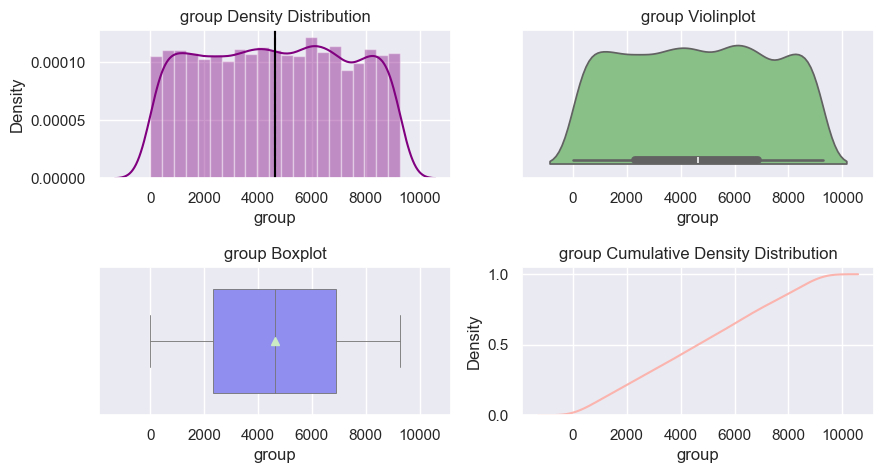

------------------------------------------------------------------------------------------------------------------------
5 Point Summary of position Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 |    1 |    1 |    2 |     8 |
+-------+-------+------+------+------+-------+


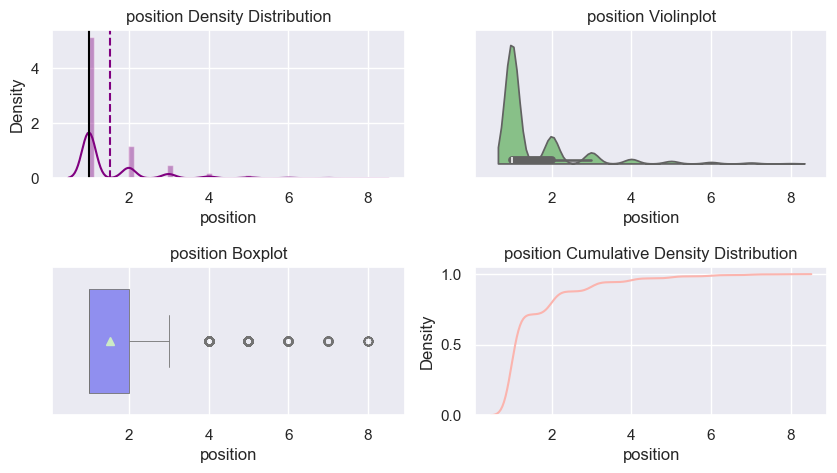

------------------------------------------------------------------------------------------------------------------------
5 Point Summary of group_size Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 |    1 |    1 |    3 |     8 |
+-------+-------+------+------+------+-------+


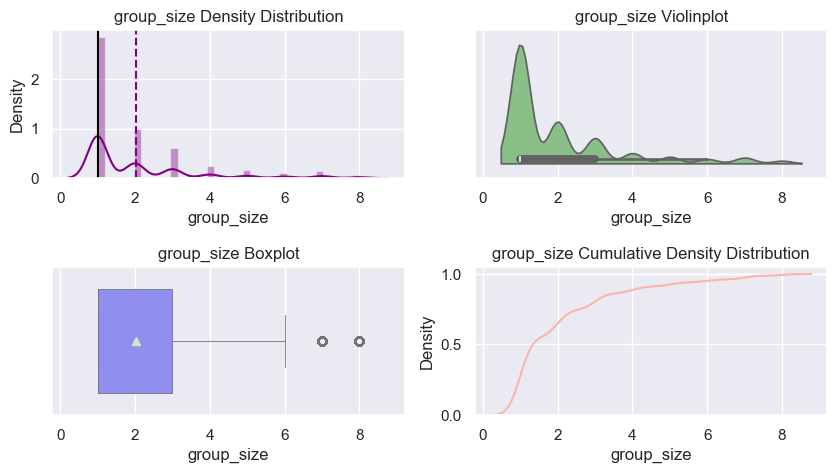

------------------------------------------------------------------------------------------------------------------------
5 Point Summary of DeckNumber Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |  173 |  448 |  983 |  1894 |
+-------+-------+------+------+------+-------+


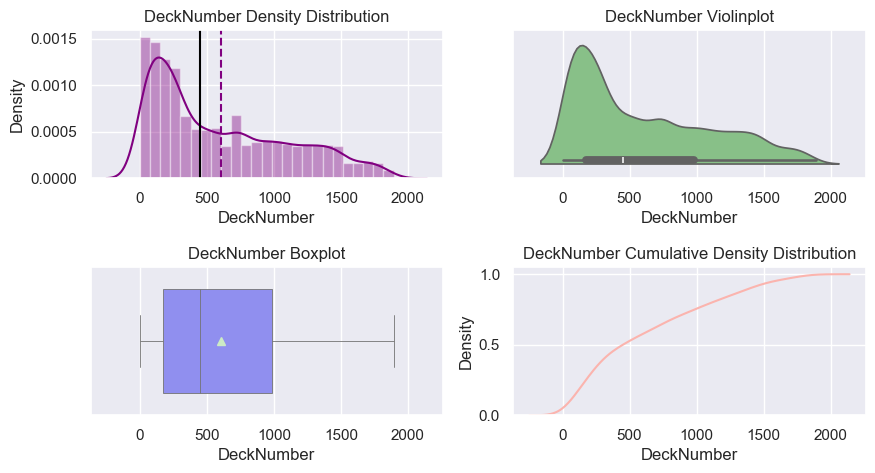

------------------------------------------------------------------------------------------------------------------------


In [19]:
# Extracting numerical columns and plotting it using above function

numerical_columns = df_cleaned.select_dtypes(include=['number']).columns.tolist()

for column in numerical_columns:
    summary(df_cleaned, column)
    print('---'*40)

# For Age, majority of passengers fall between the age 0 to 60, most of the passengers are between the age of 20 to 38, meanwhile there are some passengers with age more than 60 suggesting outliers
# For Roomservice, FoodCourt, ShoppingMall, Spa & VRDeck services, majority of passengers did not consider using those services, meanwhile there are few outlier present who have paid more for these services indicating outliers
# For the columns group and position, majority of group size of passengers are between 0 to 2, however there are 5 group of passengers with more than 4 people per group


#### Categorical Features Summary

In [20]:
# Below code plots grouped bar for each categorical feature

def plot_categorical_distribution(data, cat_columns):
    
    for col in cat_columns:
        
        plt.figure(figsize=(6, 4))
        value_counts = data[col].value_counts(normalize=True)
        ax = value_counts.plot(kind='bar')
        
        # Annotating bars with percentage values
        for p in ax.patches:
            ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')
        
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

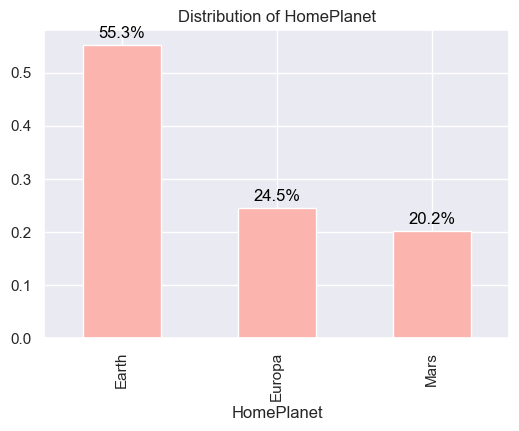

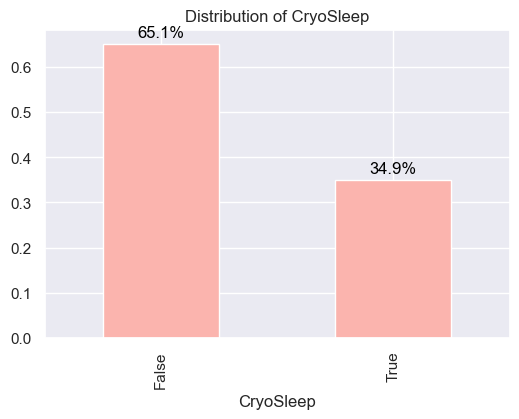

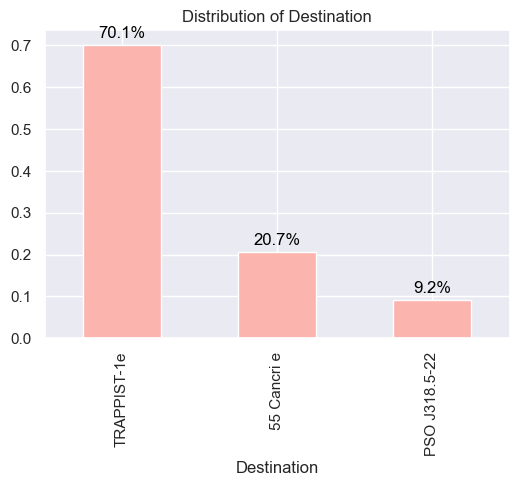

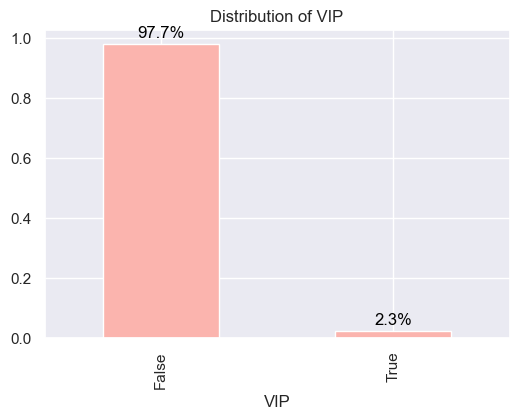

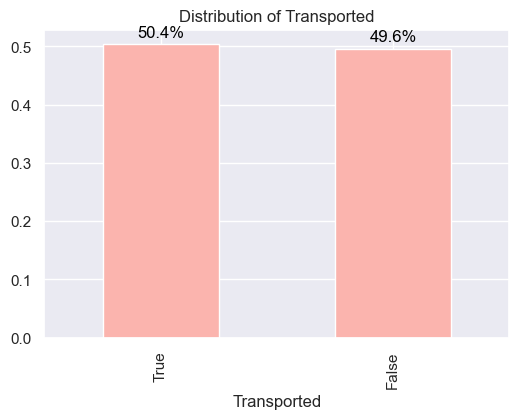

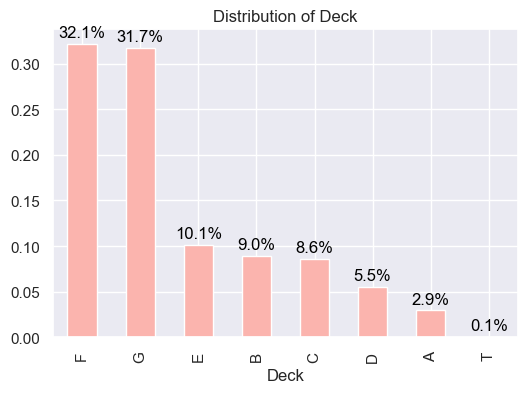

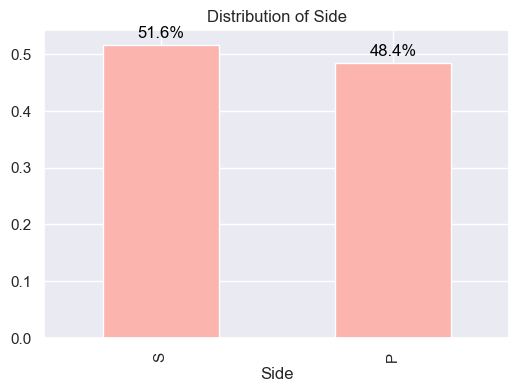

In [21]:
categorical_columns = df_cleaned.select_dtypes(exclude='number').columns.tolist()

plot_categorical_distribution(df_cleaned, categorical_columns)

# Most of the passengers are on F and G deck i.e. almost 64%, and least no of passengers are on T deck i.e. only 0.1%
# Only 2.3% of passengers have paid for the VIP services
# Data in our target variable i.e. Transported, is balanced

### Bi-Variate Analysis

In [22]:
# A function that plots each independent variable with the dependent variable

def plot_bivariate_analysis(data, target_column):
    
    # Identify categorical, numerical, and boolean columns
    categorical_columns = data.select_dtypes(exclude=['number', 'bool']).columns
    numerical_columns = data.select_dtypes(include=['number']).columns
    boolean_columns = data.select_dtypes(include=['bool']).columns
    
    # Plots all the categorical columns using countplot 
    for col in categorical_columns:
        if col != target_column:
            plt.figure(figsize=(6, 4))
            sns.countplot(x=data[col], hue=data[target_column].astype(str))
            plt.title(f'{col} vs {target_column}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.legend(title=target_column)
            plt.show()

    # Plots all the numerical columns using boxplot
    for col in numerical_columns:
        if col != target_column:
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=target_column, y=col, data=data)
            plt.title(f'{col} vs {target_column}')
            plt.xlabel(target_column)
            plt.ylabel(col)
            plt.show()

    # Plots all the boolean columns using grouped bar plots
    for col in boolean_columns:
        if col != target_column:
            # Group by target_column and calculate the value counts normalized to proportions
            grouped = data.groupby(target_column)[col].value_counts(normalize=True).unstack(fill_value=0)
            
            # Plotting
            grouped.plot(kind='bar', stacked=True, figsize=(6, 4))
            plt.title(f'{col} vs {target_column}')
            plt.xlabel(target_column)
            plt.ylabel('Proportion')
            plt.xticks([0, 1], labels=['False', 'True'], rotation=0)
            plt.legend(title=col)
            plt.show()

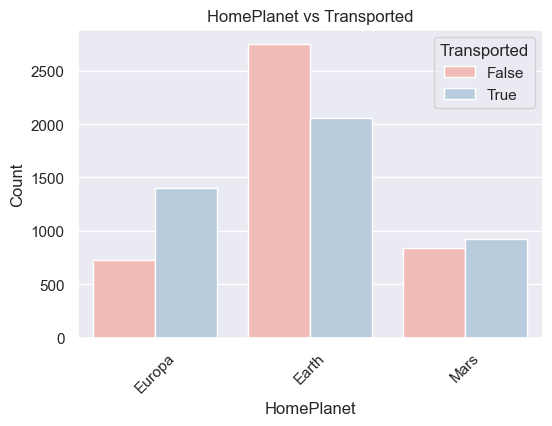

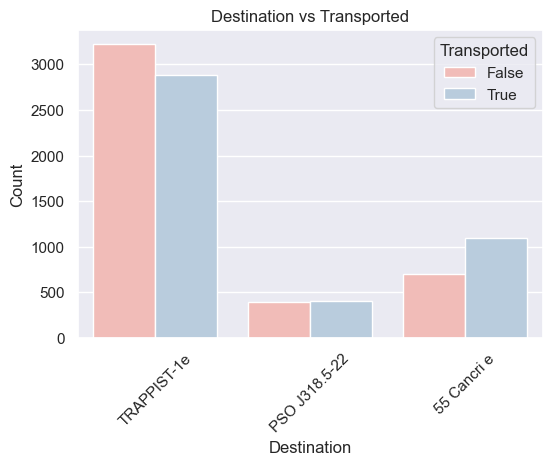

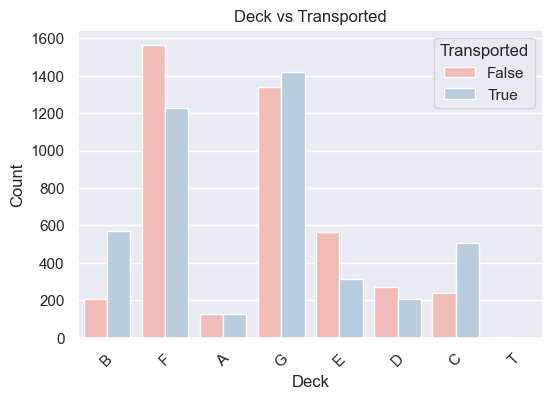

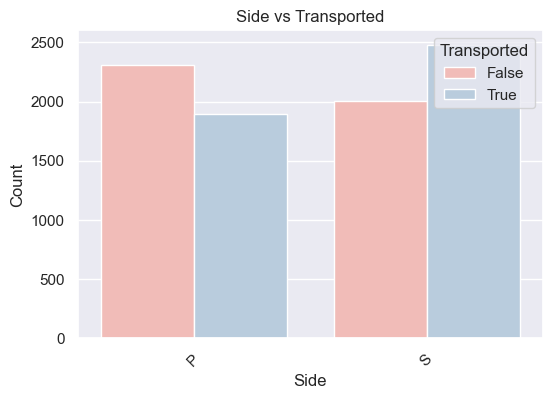

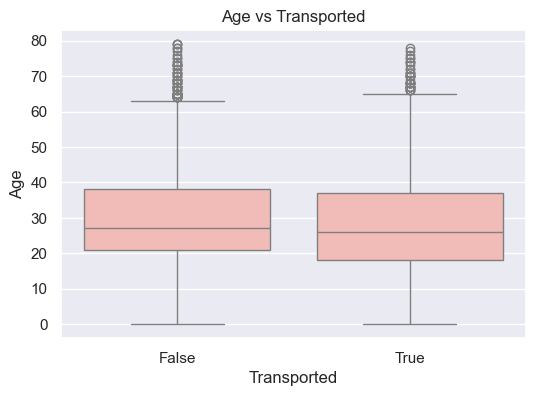

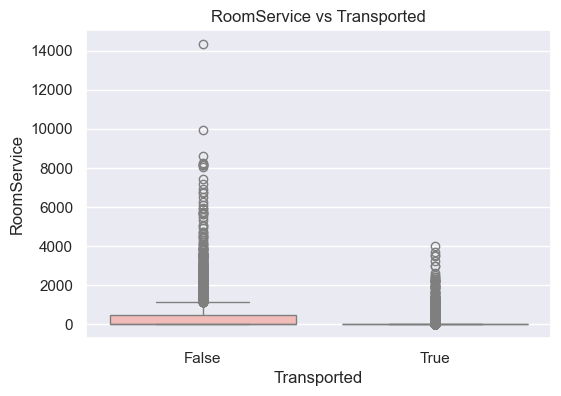

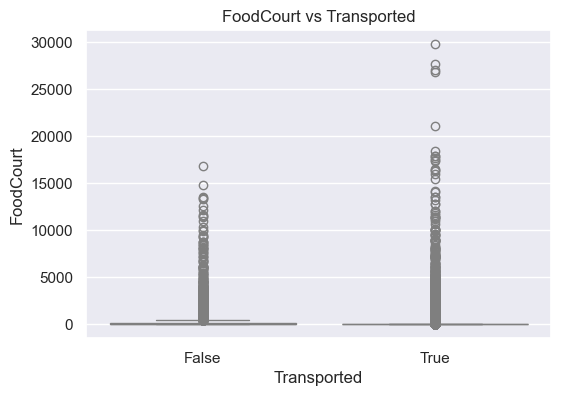

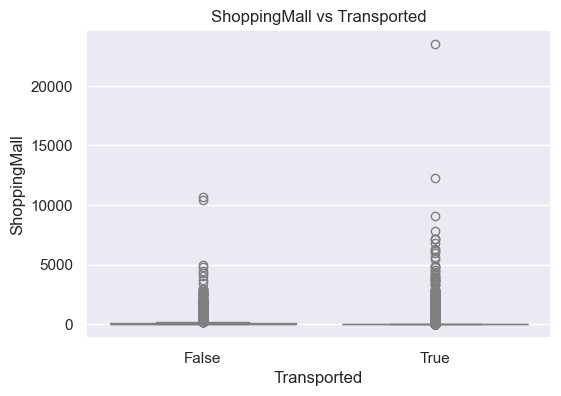

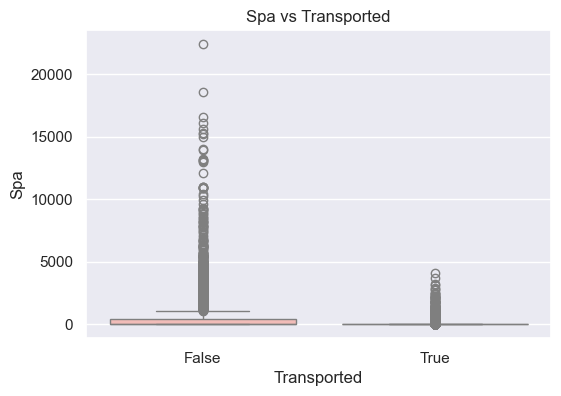

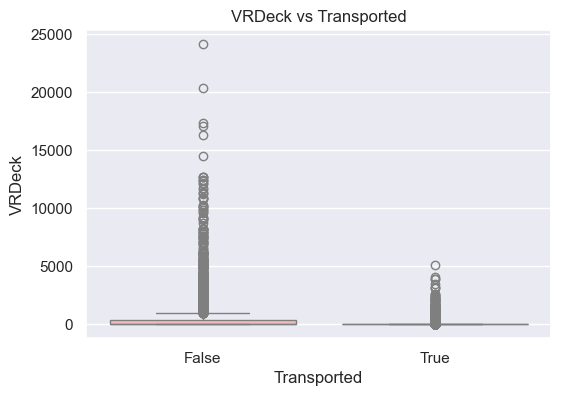

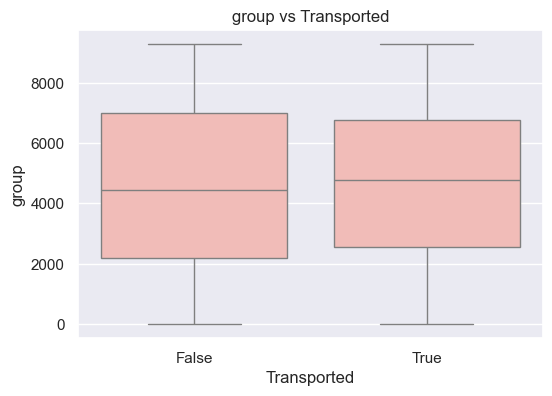

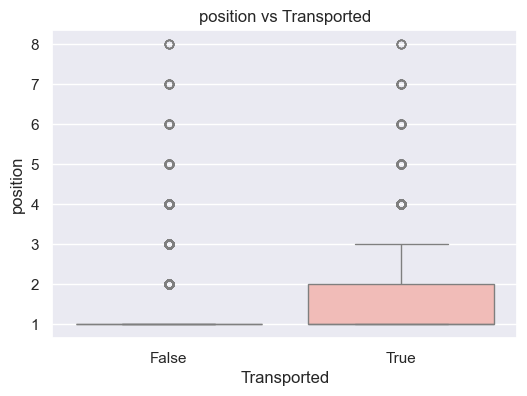

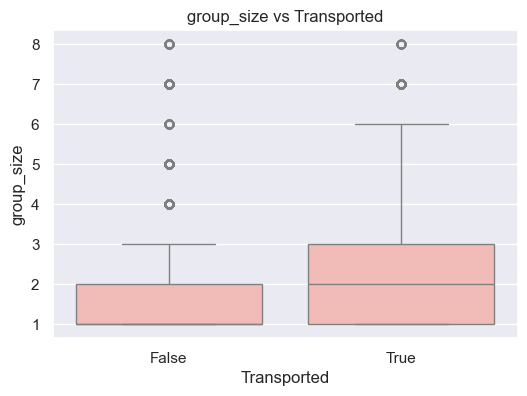

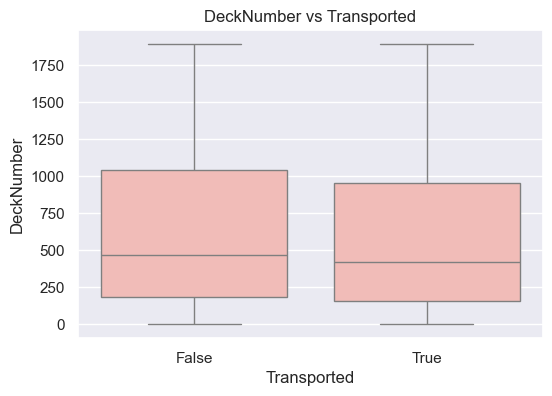

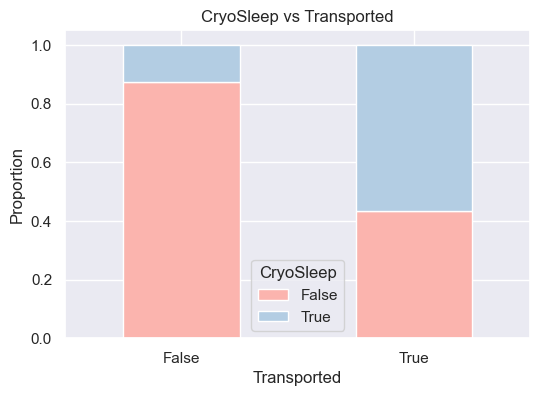

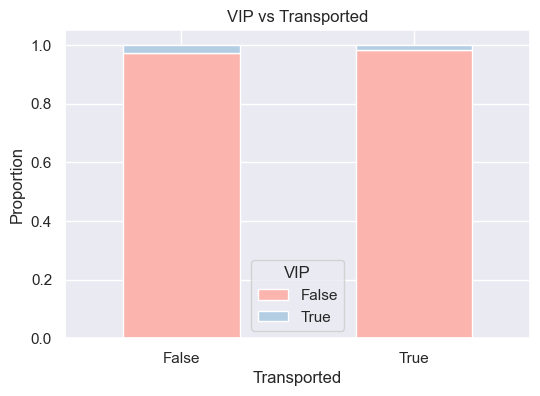

In [23]:
target_var = 'Transported'
plot_bivariate_analysis(df_cleaned, target_var)

# Passengers on deck B, C and G were highly likely to be transported to another dimensions as compared to other decks
# Passengers on side S were highly likely to be transported to another dimensions as compared to side P
# Age, group_size, DeckNumber, VIP seems to have little to no impact on predicting our target
# Passengers with group_size of more than 2 where more likely to be transported to another dimensions
# Passengers using CryoSleep where more likely to be transported as compared to passengers who were not using cryosleep
# VIP service does not indicate a significant impact on the target variable
# Passengers from home planet Europa and Mars are more likely to be transported as compared to passengers travelling from Earth

### Outlier Treatment

In [24]:
## Outlier Treatments

ind_vars = df_cleaned.columns.tolist()[:]

# Since most of the outliers are on the higher side
lower_percentile = 0
upper_percentile = 99.5

df_filtered = df_cleaned.copy()

for var in ind_vars:
    if df_filtered[var].dtype != 'object'and df_filtered[var].nunique() != 2:
        lower_threshold = df_cleaned[var].quantile(lower_percentile / 100)
        upper_threshold = df_cleaned[var].quantile(upper_percentile / 100)

        df_filtered[var] = df_filtered[var].clip(lower=lower_threshold, upper=upper_threshold)
        
df_cleaned = df_filtered

### Multi-Collinearity Checks between variables

#### Multi-variate Analysis

In [25]:
## Encoding categorical & boolean columns

from sklearn.preprocessing import LabelEncoder

def label_encode_columns(data):
    
    # Identify categorical and boolean columns
    required_cols = data.select_dtypes(exclude=['number']).columns.tolist()

    df_encoded = data.copy()

    # Apply label encoding on columns
    for col in required_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

    return df_encoded

In [26]:
df_encoded = label_encode_columns(df_cleaned)
df_encoded

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0              1          0            2  39.0    0          0.0        0.0   
1              0          0            2  24.0    0        109.0        9.0   
2              1          0            2  58.0    1         43.0     3576.0   
3              1          0            2  33.0    0          0.0     1283.0   
4              0          0            2  16.0    0        303.0       70.0   
...          ...        ...          ...   ...  ...          ...        ...   
8688           1          0            0  41.0    1          0.0     6819.0   
8689           0          1            1  18.0    0          0.0        0.0   
8690           0          0            2  26.0    0          0.0        0.0   
8691           1          0            0  32.0    0          0.0     1049.0   
8692           1          0            2  44.0    0        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  Transported  group  position  group_size  \
0              0.0     0.0     0.0            0      1         1           1   
1             25.0   549.0    44.0            1      2         1           1   
2              0.0  6715.0    49.0            0      3         1           2   
3            371.0  3329.0   193.0            0      3         2           2   
4            151.0   565.0     2.0            1      4         1           1   
...            ...     ...     ...          ...    ...       ...         ...   
8688           0.0  1643.0    74.0            0   9227         1           1   
8689           0.0     0.0     0.0            0   9227         1           1   
8690        1872.0     1.0     0.0            1   9227         1           1   
8691           0.0   353.0  3235.0            0   9227         1           2   
8692           0.0     0.0    12.0            1   9227         2           2   

      Deck  DeckNumber  Side  
0        1         0.0     0  
1        5         0.0     1  
2        0         0.0     1  
3        0         0.0     1  
4        5         1.0     1  
...    ...         ...   ...  
8688     0        98.0     0  
8689     6      1499.0     1  
8690     6      1500.0     1  
8691     4       608.0     1  
8692     4       608.0     1  

[8693 rows x 17 columns]

In [27]:
## Separate independent variables and dependent variables

X = df_encoded.drop(columns=['Transported'])
y = df_encoded['Transported']

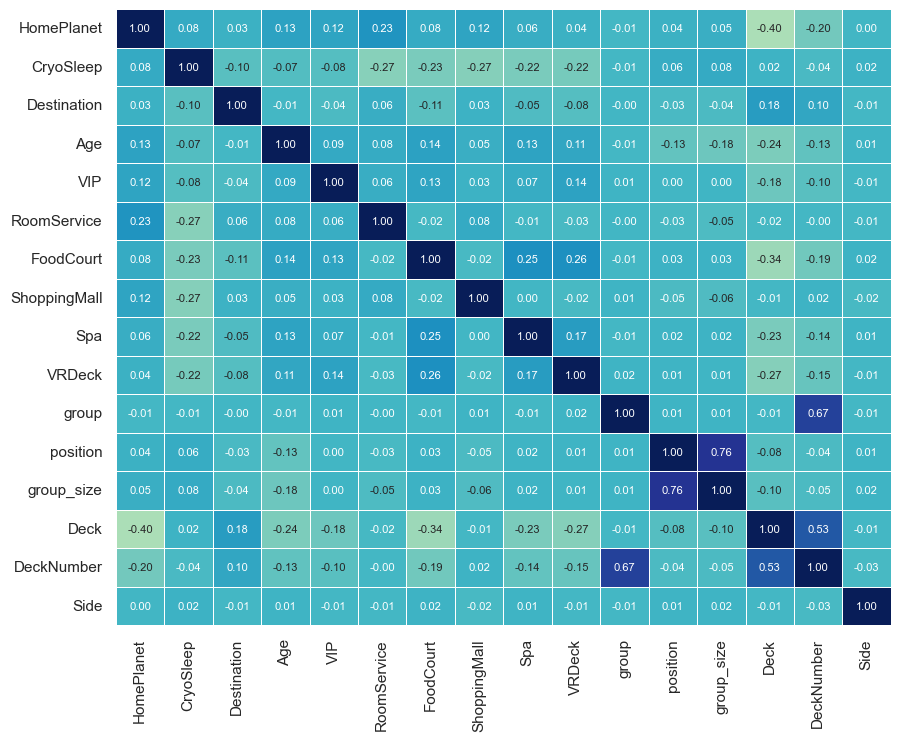

In [28]:
## Plotting Heatmap

sns.set(rc={"figure.figsize": (10, 8)})
sns.heatmap(
    X.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
    annot_kws={"size": 8}
)
plt.show()

# On 70% threshold, only group_size and position seems to be correlated

In [29]:
## Splitting the Dataset in training and test set
from sklearn.model_selection import train_test_split

X.drop(columns=['Age', 'group_size', 'VIP'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120, stratify=y)


In [30]:
## Scaling my independent variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Application

1. Logistic Regression
3. SVM
4. Decision Tree
5. Random Forest


#### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lg_classifier = LogisticRegression(C= 0.1, max_iter= 100, penalty= 'l2', random_state=120)
lg_classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, random_state=120)

In [32]:
## Logistic regression predictions on training set & Test set

y_train_pred_lg = lg_classifier.predict(X_train_scaled)
y_test_pred_lg = lg_classifier.predict(X_test_scaled)

In [33]:
## Logistic Regression model evaluation

model_evaluation(y_train, y_train_pred_lg, y_test, y_test_pred_lg)

Confusion Matrix - Training Set:
[[2654  798]
 [ 677 2825]]

Confusion Matrix - Test Set:
[[650 213]
 [159 717]]

**************************************************

Accuracy - Training Set: 0.7878918607995399
Accuracy - Test Set: 0.7860839562967222

F1 Score - Training Set: 0.7878010511229603
F1 Score - Test Set: 0.785827650811114

Precision - Training Set: 0.7881879607782927
Precision - Test Set: 0.7870929495915391

Recall - Training Set: 0.7878918607995399
Recall - Test Set: 0.7860839562967222


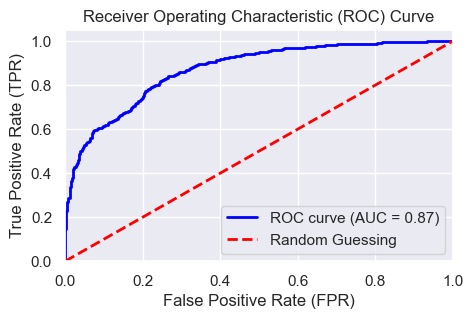

In [34]:
## ROC-AUC curve for logistic regression

roc_auc_curve(lg_classifier, X_test_scaled, y_test)

#### SVM Model Implementation

In [36]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=10, probability=True, random_state=120, gamma=0.1) 
svm_classifier.fit(X_train_scaled, y_train)


SVC(C=10, gamma=0.1, probability=True, random_state=120)

In [37]:
## predictions on training set & test set

y_train_pred_svm = svm_classifier.predict(X_train_scaled)
y_test_pred_svm = svm_classifier.predict(X_test_scaled)


In [38]:
## SVM model evaluation

model_evaluation(y_train, y_train_pred_svm, y_test, y_test_pred_svm)


Confusion Matrix - Training Set:
[[2848  604]
 [ 545 2957]]

Confusion Matrix - Test Set:
[[686 177]
 [156 720]]

**************************************************

Accuracy - Training Set: 0.8347713546160483
Accuracy - Test Set: 0.8085106382978723

F1 Score - Training Set: 0.8347493759569353
F1 Score - Test Set: 0.8084654100520093

Precision - Training Set: 0.8348476326125708
Precision - Test Set: 0.8086561681236271

Recall - Training Set: 0.8347713546160483
Recall - Test Set: 0.8085106382978723


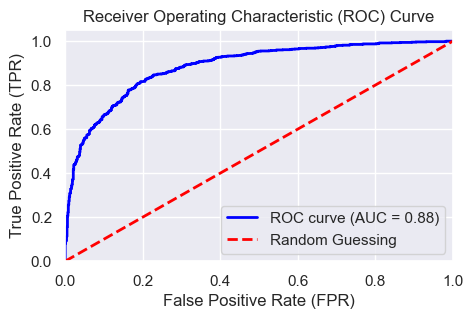

In [944]:
# ROC-AUC curve for SVM

roc_auc_curve(svm_classifier, X_test_scaled, y_test)


#### Random Forest Model implementation

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100, criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=10)

In [40]:
## predictions on training set & test set

y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)


In [41]:
## Random Forest model evaluation

model_evaluation(y_train, y_train_pred_rf, y_test, y_test_pred_rf)

Confusion Matrix - Training Set:
[[2949  503]
 [ 404 3098]]

Confusion Matrix - Test Set:
[[677 186]
 [152 724]]

**************************************************

Accuracy - Training Set: 0.8695714696577509
Accuracy - Test Set: 0.8056354226566993

F1 Score - Training Set: 0.8695316658958674
F1 Score - Test Set: 0.80553264183628

Precision - Training Set: 0.8698447276959353
Precision - Test Set: 0.8060468278675295

Recall - Training Set: 0.8695714696577509
Recall - Test Set: 0.8056354226566993


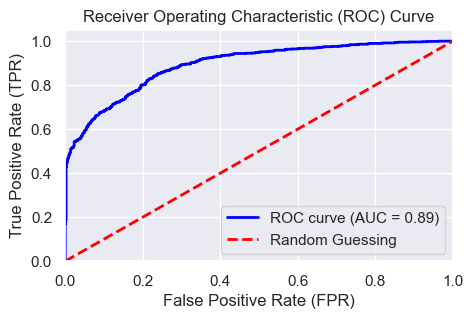

In [42]:
## ROC-AUC curve for Random Forest

roc_auc_curve(rf_classifier, X_test, y_test)

#### XGBoost model implementation

In [43]:
from xgboost import XGBClassifier

xg_classifier = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', n_estimators=50, max_depth=5, device='cuda', reg_alpha=0.1, subsample=0.9, learning_rate=0.2)
xg_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [44]:
## predictions on training set & test set

y_train_pred_xg = xg_classifier.predict(X_train)
y_test_pred_xg = xg_classifier.predict(X_test)


In [45]:
## XGBoost model evaluation

model_evaluation(y_train, y_train_pred_xg, y_test, y_test_pred_xg)


Confusion Matrix - Training Set:
[[2912  540]
 [ 491 3011]]

Confusion Matrix - Test Set:
[[685 178]
 [144 732]]

**************************************************

Accuracy - Training Set: 0.8517400057520851
Accuracy - Test Set: 0.8148361127084531

F1 Score - Training Set: 0.8517251301719932
F1 Score - Test Set: 0.8147381972523141

Precision - Training Set: 0.8517948639408781
Precision - Test Set: 0.8152643120843721

Recall - Training Set: 0.8517400057520851
Recall - Test Set: 0.8148361127084531


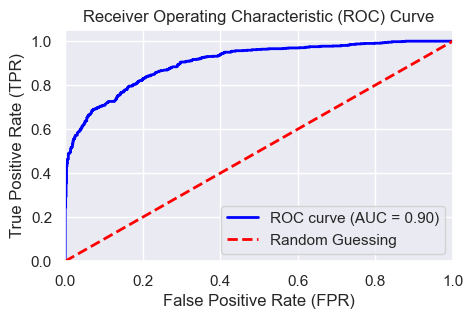

In [46]:
## ROC-AUC curve for Random Forest

roc_auc_curve(xg_classifier, X_test, y_test)

# Applying models on my Validation set

In [47]:
## Importing Validation set

df_val = pd.read_csv(r'../Data/test.csv')

In [48]:
## EDA and Preprocessing Validation set

def eda_preprocess(data):
    data_cleaned = data.copy()

    # Dropping Name column
    data_cleaned.drop(columns='Name', inplace=True)
    
    # Imputing_missing_values
    data_cleaned = impute_missing_values(data_cleaned)
    
    # Feature engineer 'passenger_id' column
    data_cleaned[['group', 'position']] = data_cleaned['PassengerId'].str.split('_', expand=True)
    data_cleaned['group'] = data_cleaned['group'].astype(int)
    data_cleaned['position'] = data_cleaned['position'].astype(int)
    
    group_sizes = data_cleaned.groupby('group').size().reset_index(name='group_size')
    data_cleaned = data_cleaned.merge(group_sizes, on='group')
    
    # Dropping the original passenger_id column post cleaning
    data_cleaned.drop(columns=['PassengerId'], inplace=True)
    
    # Feature engineer 'Cabin' column
    data_cleaned['Deck'] = data_cleaned['Cabin'].str.extract(r'([A-Za-z])').astype(str)
    data_cleaned['DeckNumber'] = data_cleaned['Cabin'].str.extract(r'(\d+)').astype(float)
    data_cleaned['Side'] = data_cleaned['Cabin'].str.extract(r'(/([A-Za-z]))')[1].astype(str)
    
    # Dropping the original Cabin column
    data_cleaned.drop(columns=['Cabin'], inplace=True)
    
    # Label encoding required columns
    data_cleaned = label_encode_columns(data_cleaned)
    
    # Dropping unrequired columns from dataset
    data_cleaned.drop(columns=['Age', 'group_size', 'VIP'], inplace=True)
    
    return data_cleaned
    

In [49]:
X_val = eda_preprocess(df_val)

In [50]:
# Applying trained model on the validation set

predictions = xg_classifier.predict(X_val)

# Convert numerical predictions to boolean
boolean_predictions = [bool(pred) for pred in predictions]

In [51]:
# Combining the results with the ID column & exporting the same

PassengerId = df_val['PassengerId']

results = pd.DataFrame({
    'PassengerId': PassengerId,
    'Transported': boolean_predictions
})

results.to_csv(r'../Results/test_results.csv', index=False)


### Hyper-parameter tuning using GridsearchCV

- Logistic Regression
- SVM
- Random Forest
- XGBoost

In [52]:
## Gridsearch for Logistic Regreesion

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

lg_param_grid = {
    'penalty': ['l1', 'l2'],                    # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],       # Inverse of regularization strength
    'max_iter': [100, 500, 1000],             # Maximum number of iterations
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg']
}

lg_grid_search = GridSearchCV(estimator=lg_classifier, param_grid=lg_param_grid, cv=5, scoring='accuracy', verbose=1)
lg_grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", lg_grid_search.best_params_)

lg_best_model = lg_grid_search.best_estimator_
y_pred_lg = lg_best_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_lg))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7860839562967222


In [849]:
## Gridsearch for XGBoost

xg_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [5, 7],  # Maximum depth of a tree
    'subsample': [0.9, 1.0],  # Subsample ratio of the training instances
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.01, 0.1],  # L1 regularization term on weights
    'reg_lambda': [0, 0.01, 0.1]  # L2 regularization term on weights
}

xg_grid_search = GridSearchCV(xg_classifier, xg_param_grid, cv=10, scoring='accuracy')
xg_grid_search.fit(X_train, y_train)

xg_best_params = xg_grid_search.best_params_
print("Best Hyperparameters:", xg_best_params)

# Use the best model to make predictions
y_test_pred_xg_gs = xg_grid_search.predict(X_test)

# Evaluate the performance of the tuned model
accuracy_test_xg_gs = accuracy_score(y_test, y_test_pred_xg_gs)

print("Accuracy - Test Set (Tuned Model):", accuracy_test_xg_gs)

Best Hyperparameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0.01, 'subsample': 1.0}
Accuracy - Test Set (Tuned Model): 0.7975848188614146
